In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Load the dataset
df = pd.read_csv('/content/appliance_energy.csv')

#Display the first few rows to understand the structure
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


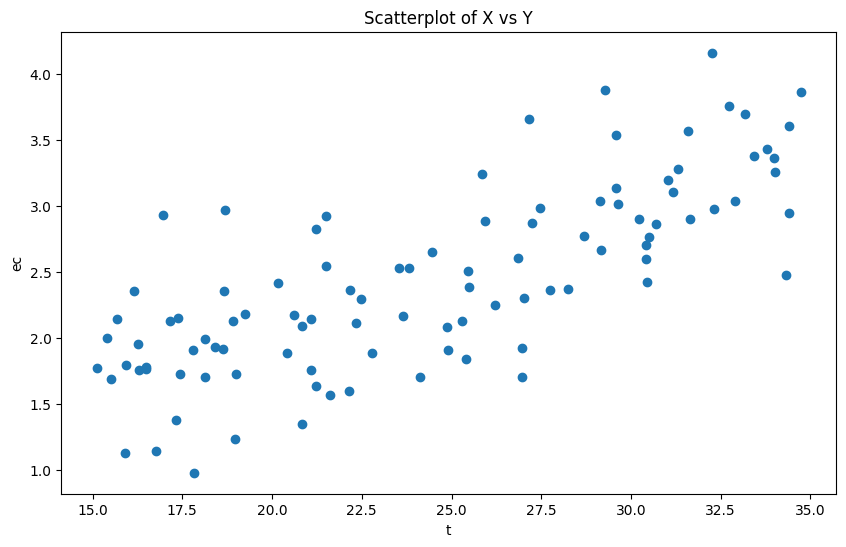

In [ ]:
# prompt: scatterplot for the above given data

# Assuming 'x' and 'y' are the columns you want to plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)']) # Replace 'x' and 'y' with your column names
plt.xlabel('t')  # Replace with your desired label
plt.ylabel('ec')  # Replace with your desired label
plt.title('Scatterplot of X vs Y') # Replace with your desired title
plt.show()

In [ ]:
null_values = df.isnull().sum()

print(null_values)

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
X= df['Temperature (°C)']
y= df['Energy Consumption (kWh)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train is 2-dimensional
if len(X_train.shape) == 1:
    X_train = X_train.values.reshape(-1, 1)  # If X_train is a pandas Series
elif isinstance(X_train, pd.Series):
    X_train = X_train.values.reshape(-1, 1)

# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [ ]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.16342487842925055
R-squared: 0.6119478445218713


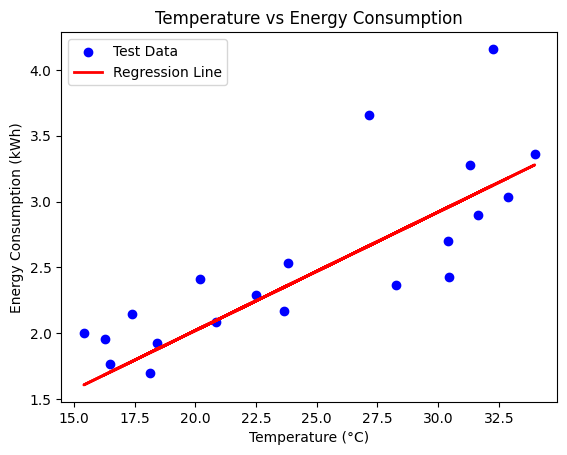

In [ ]:
# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')
plt.legend()

In [ ]:
import joblib
# Save the model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [ ]:
model = joblib.load('linear_regression_model.pkl')

In [ ]:
temp = np.array([[22.49]])

In [ ]:
#energy prediction
prediction = model.predict(temp)
print("Predicted energy consumption: ", prediction)

Predicted energy consumption:  [2.24530337]
